<a href="https://colab.research.google.com/github/Boudouaromar/Machine-learning/blob/master/MNIST_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn import datasets,metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [0]:
digits=datasets.load_digits()

In [0]:
print(digits.data.shape)
print(digits.target.shape)

(1797, 64)
(1797,)


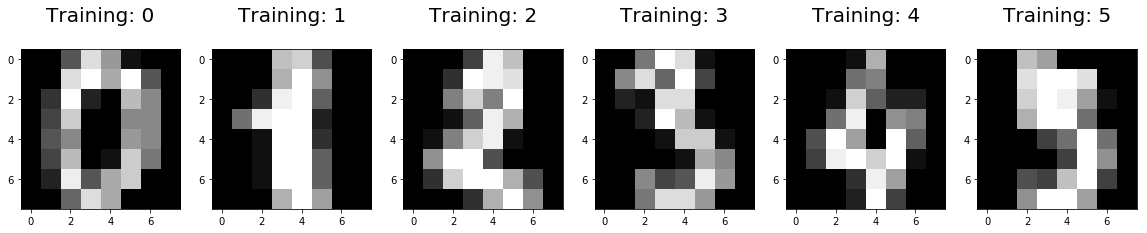

In [0]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:6], digits.target[0:6])):
    plt.subplot(1, 6, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.25, random_state=0)

In [0]:
#Training the model
logistreg=LogisticRegression()
logistreg.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
#Predicting labels for new data 
#Predict for one observation
logistreg.predict(x_test[0].reshape(1, -1))


array([2])

In [0]:
#Prediction for the test data:
predictions = logistreg.predict(x_test)

In [0]:
#Evaluating the classifier
score=logistreg.score(x_test,y_test)
print(score)

0.9533333333333334


In [0]:
confusion_matrix=metrics.confusion_matrix(y_test,predictions)


In [0]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix')
    return fig

Figure(720x504)


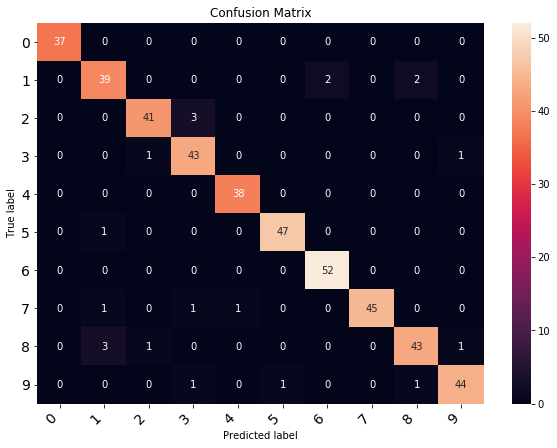

In [0]:
class_names=[0,1,2,3,4,5,6,7,8,9]
print(print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14))